In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.stats import norm


def mutiplyGauss(m1, s1, m2, s2):
    s = 1 / (1 / s1 + 1 / s2)
    m = (m1 / s1 + m2 / s2) * s
    return m, s

def divideGauss(m1, s1, m2, s2):
    s = 1 / (1 / s1 - 1 / s2)
    m = (m1 / s1 - m2 / s2) * s
    return m, s

def truncGaussMM(a, b, m0, s0):
    a_scaled, b_scaled = (a - m0) / np.sqrt(s0), (b - m0) / np.sqrt(s0)
    m = truncnorm.mean(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    s = truncnorm.var(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    return m, s

# Define prior parameters
m1, m2 = 25, 25  # Prior mean and variance for s1
s1, s2 = (25/3)**2, (25/3)**2  # Prior mean and variance for s2
st = (25/6)**2  # Variance for t given s1, s2
y = 1  # Player 1 wins

# Messages initialization
mu_s1_m, mu_s1_s = m1, s1  # Message from f_{s1}
mu_s2_m, mu_s2_s = m2, s2  # Message from f_{s2}

# Message passing
for iteration in range(10):
    # Message from s1 and s2 to t (f_t):
    mu_t_m = mu_s1_m - mu_s2_m  # Mean of t given s1 and s2
    mu_t_s = mu_s1_s + mu_s2_s + st  # Variance of t given s1 and s2

    # Truncated Gaussian for t
    if y == 1:
        a, b = 0, np.Inf
    else:
        a, b = np.NINF, 0

    pt_m, pt_s = truncGaussMM(a, b, mu_t_m, mu_t_s) # q(t)

    mu_tfs_m, mu_tfs_s = divideGauss(pt_m, pt_s, mu_t_m, mu_t_s) # from t to f_(s1,s2,t) q(t)/mu_t = mu_tfs
    # for s1

    mu_fts_s1_m, mu_fts_s1_s = mu_s2_m + mu_tfs_m, mu_s2_s + mu_tfs_s + mu_t_s # f_(s1,s2,t) to s1 = f(t,s1,s2)*mu_tfs = adding variance and taking mean of mu_tfs
    
    mu_s1_new_m, mu_s1_new_s = mutiplyGauss(mu_s1_m, mu_s1_s,mu_fts_s1_m, mu_fts_s1_s) # New value for s1

    #Now do for s2

    mu_fts_s2_m, mu_fts_s2_s = mu_s1_m - mu_tfs_m, mu_s1_s + mu_tfs_s + mu_t_s # f_(s1,s2,t) to s1 = f(t,s1,s2)*mu_tfs = adding variance and taking mean of mu_tfs

    mu_s2_new_m, mu_s2_new_s = mutiplyGauss(mu_s2_m, mu_s2_s,mu_fts_s2_m, mu_fts_s2_s) # New value for s2

    # Update messages from t back to s1 and s2

    mu_s1_m, mu_s1_s = mu_s1_new_m, mu_s1_new_s
    mu_s2_m, mu_s2_s = mu_s2_new_m, mu_s2_new_s

    print(f"Iteration {iteration}: s1 mean = {mu_s1_m}, s1 var = {mu_s1_s}, s2 mean = {mu_s2_m}, s2 var = {mu_s2_s}")
    print(f"Iteration {iteration}: t mean = {pt_m}, t var = {pt_s}")

# s1; mu 2 + mu 9, sigma 2 + sigma 3 + sigma 9

Iteration 0: s1 mean = 27.83079162895395, s1 var = 56.896417024486965, s2 mean = 22.169208371046054, s2 var = 56.896417024486965
Iteration 0: t mean = 9.973557010035819, t var = 56.77816056756542
Iteration 1: s1 mean = 29.588744347672378, s1 var = 48.10654028148802, s2 mean = 20.411255652327633, s2 var = 48.10654028148802
Iteration 1: t mean = 11.525825381075578, t var = 63.56371445610642
Iteration 2: s1 mean = 30.73318957797106, s1 var = 41.891663517375115, s2 mean = 19.26681042202895, s2 var = 41.891663517375115
Iteration 2: t mean = 12.820738376022678, t var = 66.86504067958722
Iteration 3: s1 mean = 31.514239709379844, s1 var = 37.406092784912296, s2 mean = 18.485760290620163, s2 var = 37.406092784912296
Iteration 3: t mean = 13.86606396589836, t var = 67.87025507301333
Iteration 4: s1 mean = 32.0718434179276, s1 var = 34.07971249256899, s2 mean = 17.928156582072404, s2 var = 34.07971249256899
Iteration 4: t mean = 14.699718545750459, t var = 67.60655189152557
Iteration 5: s1 mean 

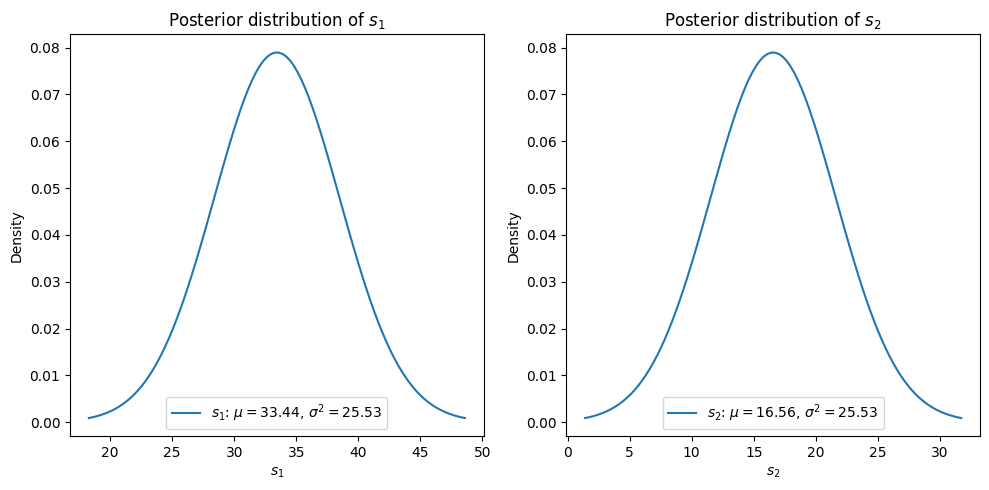

In [3]:
# Generate points for plotting Gaussian distributions
x_s1 = np.linspace(mu_s1_m - 3*np.sqrt(mu_s1_s), mu_s1_m + 3*np.sqrt(mu_s1_s), 100)
x_s2 = np.linspace(mu_s2_m - 3*np.sqrt(mu_s2_s), mu_s2_m + 3*np.sqrt(mu_s2_s), 100)

# Compute the Gaussian PDFs for s1 and s2
pdf_s1 = norm.pdf(x_s1, mu_s1_m, np.sqrt(mu_s1_s))
pdf_s2 = norm.pdf(x_s2, mu_s2_m, np.sqrt(mu_s2_s))

# Plotting
plt.figure(figsize=(10, 5))

# Plot for s1
plt.subplot(1, 2, 1)
plt.plot(x_s1, pdf_s1, label=f"$s_1$: $\mu={mu_s1_m:.2f}$, $\sigma^2={mu_s1_s:.2f}$")
plt.title('Posterior distribution of $s_1$')
plt.xlabel('$s_1$')
plt.ylabel('Density')
plt.legend()

# Plot for s2
plt.subplot(1, 2, 2)
plt.plot(x_s2, pdf_s2, label=f"$s_2$: $\mu={mu_s2_m:.2f}$, $\sigma^2={mu_s2_s:.2f}$")
plt.title('Posterior distribution of $s_2$')
plt.xlabel('$s_2$')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

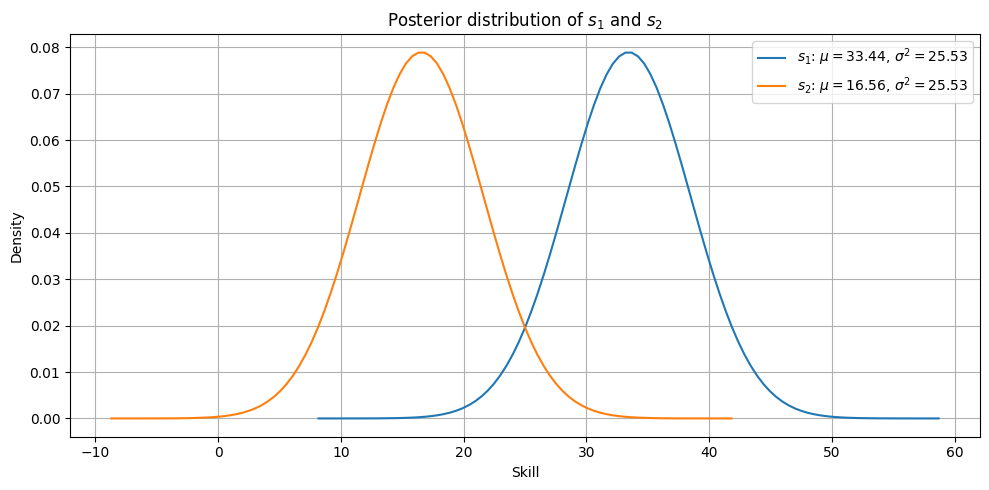

In [4]:
# Generate points for plotting Gaussian distributions
x_s1 = np.linspace(mu_s1_m - 5*np.sqrt(mu_s1_s), mu_s1_m + 5*np.sqrt(mu_s1_s), 100)
x_s2 = np.linspace(mu_s2_m - 5*np.sqrt(mu_s2_s), mu_s2_m + 5*np.sqrt(mu_s2_s), 100)

# Compute the Gaussian PDFs for s1 and s2
pdf_s1 = norm.pdf(x_s1, mu_s1_m, np.sqrt(mu_s1_s))
pdf_s2 = norm.pdf(x_s2, mu_s2_m, np.sqrt(mu_s2_s))

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(x_s1, pdf_s1, label=f"$s_1$: $\mu={mu_s1_m:.2f}$, $\sigma^2={mu_s1_s:.2f}$")
plt.title('Posterior distribution of $s_1$')
plt.xlabel('$s_1$')
plt.ylabel('Density')
plt.legend()

plt.plot(x_s2, pdf_s2, label=f"$s_2$: $\mu={mu_s2_m:.2f}$, $\sigma^2={mu_s2_s:.2f}$")
plt.title('Posterior distribution of $s_1$ and $s_2$')
plt.xlabel('Skill')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


Running Gibbs Sampler with 100 iterations (burn-in 50)...


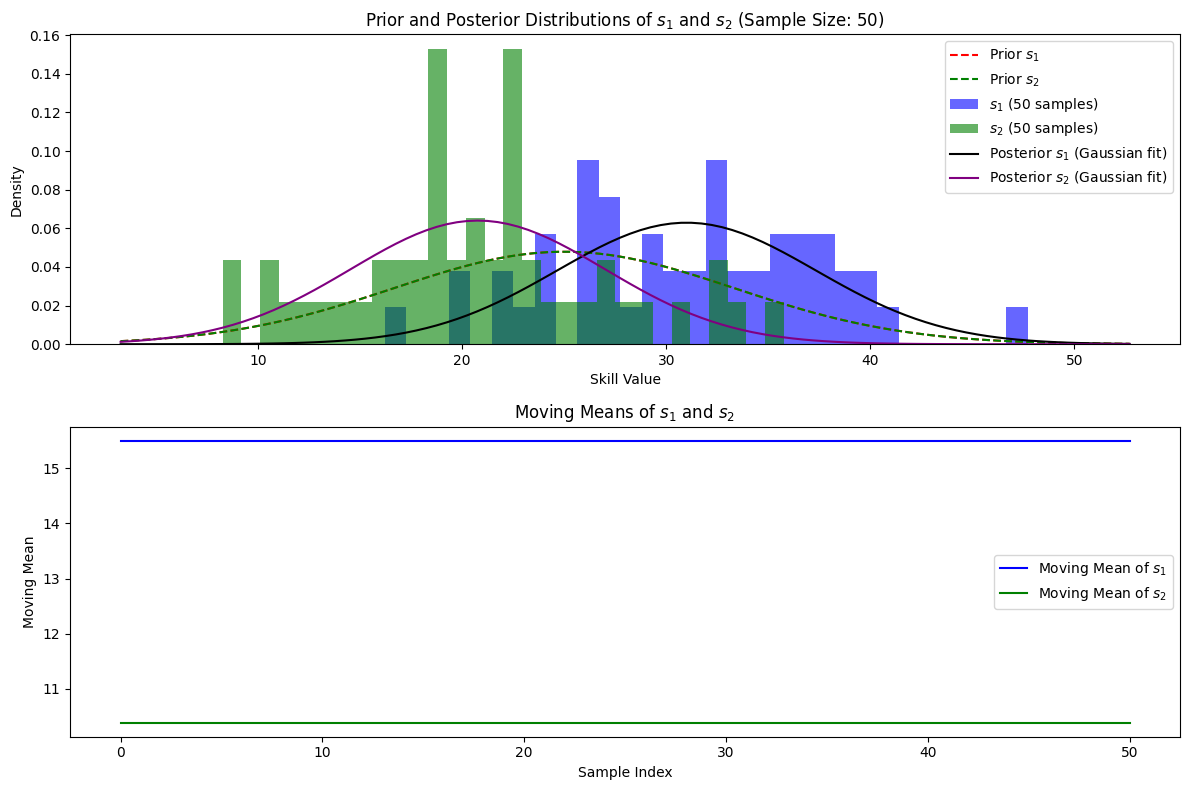

Sampled Mean of s1: 30.9968, Variance: 40.2160
Sampled Mean of s2: 20.7706, Variance: 38.8617
Time taken: 0.3569 seconds

Running Gibbs Sampler with 500 iterations (burn-in 250)...


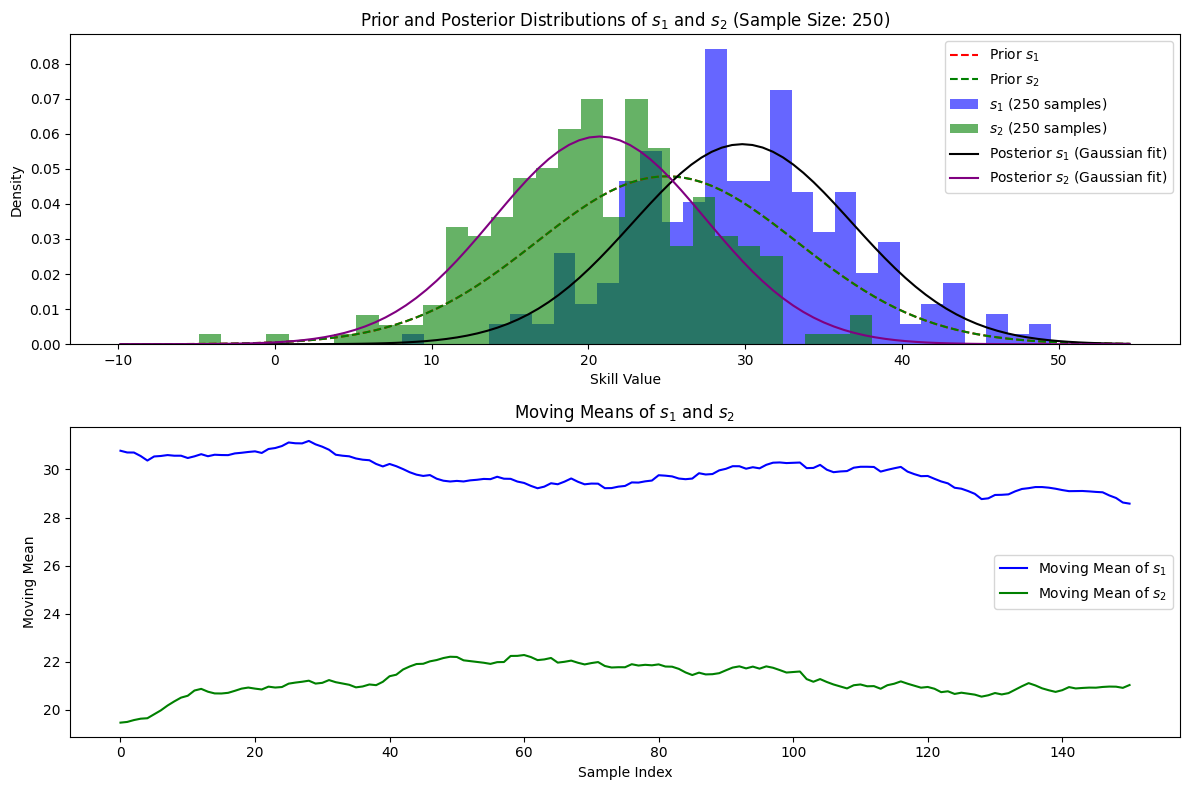

Sampled Mean of s1: 29.8178, Variance: 48.9505
Sampled Mean of s2: 20.7034, Variance: 45.4010
Time taken: 0.4262 seconds

Running Gibbs Sampler with 1000 iterations (burn-in 500)...


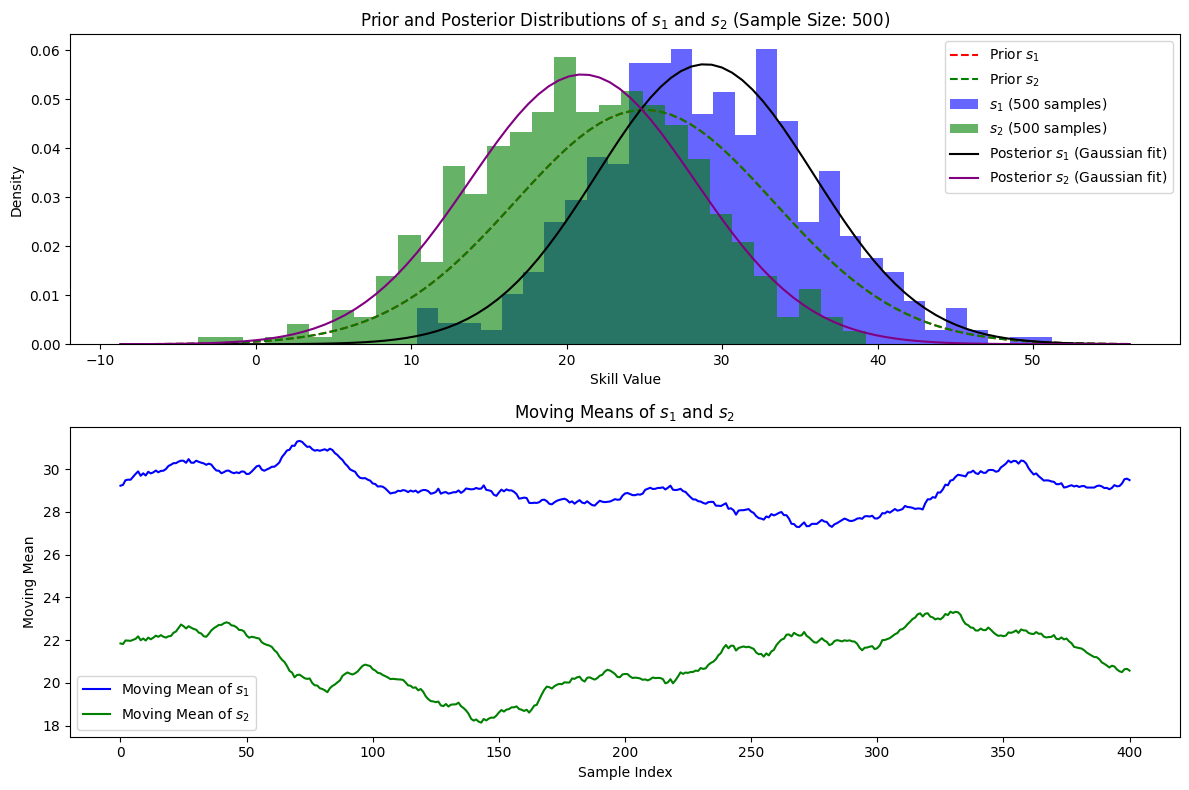

Sampled Mean of s1: 28.9126, Variance: 48.6553
Sampled Mean of s2: 21.0177, Variance: 52.4108
Time taken: 0.5405 seconds

Running Gibbs Sampler with 3000 iterations (burn-in 1500)...


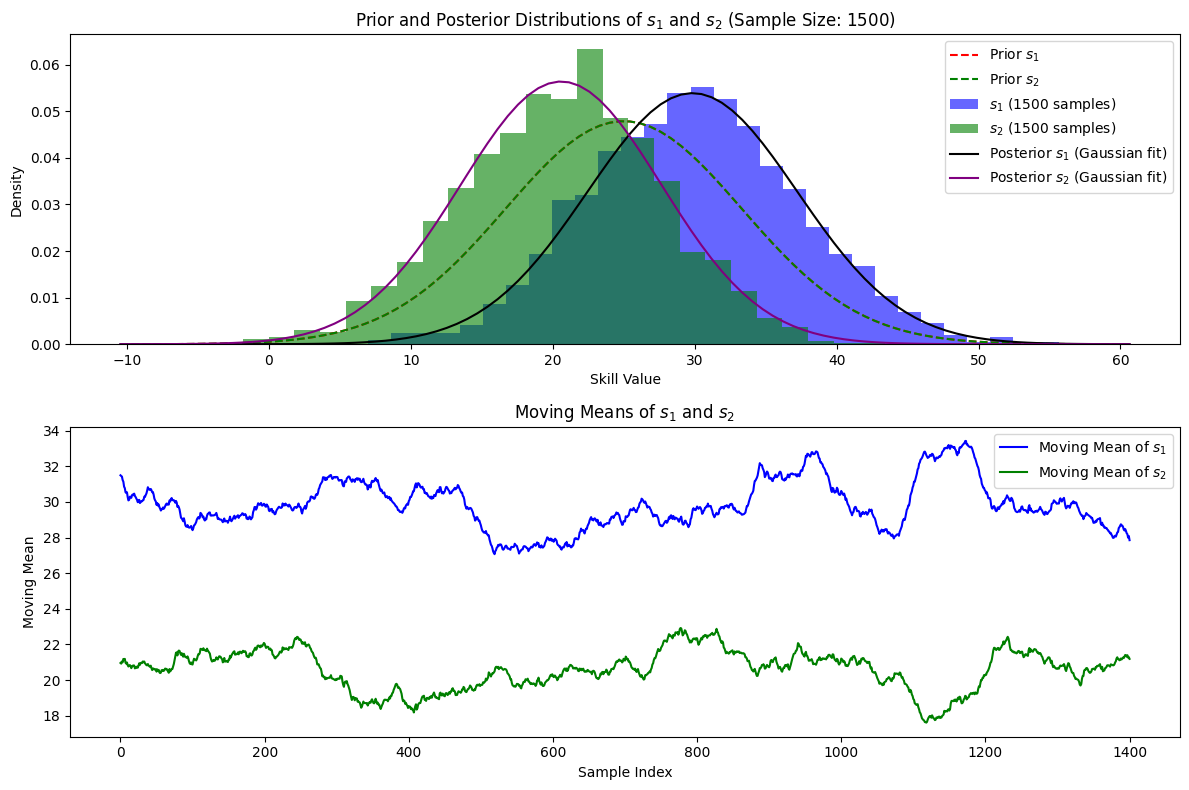

Sampled Mean of s1: 29.8443, Variance: 54.8003
Sampled Mean of s2: 20.5918, Variance: 50.0609
Time taken: 0.7677 seconds

Running Gibbs Sampler with 5000 iterations (burn-in 2500)...


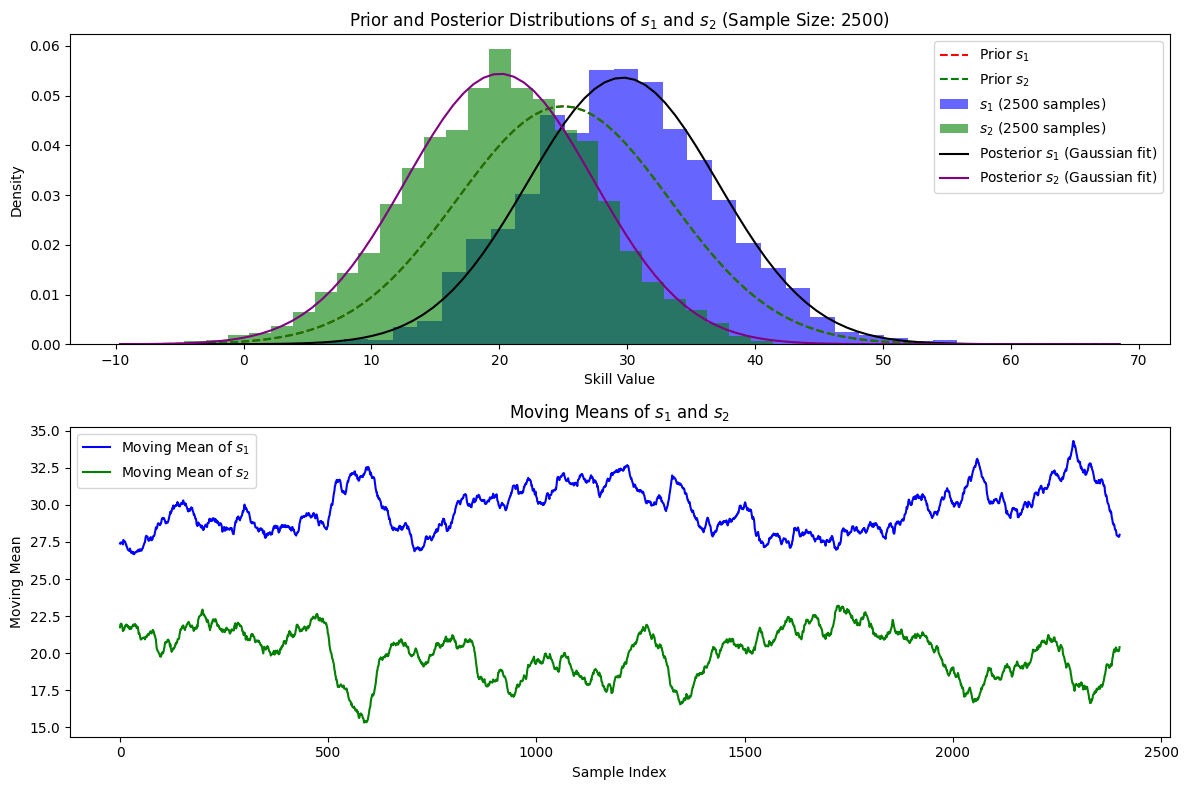

Sampled Mean of s1: 29.6388, Variance: 55.3527
Sampled Mean of s2: 20.0329, Variance: 53.7744
Time taken: 0.9686 seconds

Running Gibbs Sampler with 7000 iterations (burn-in 3500)...


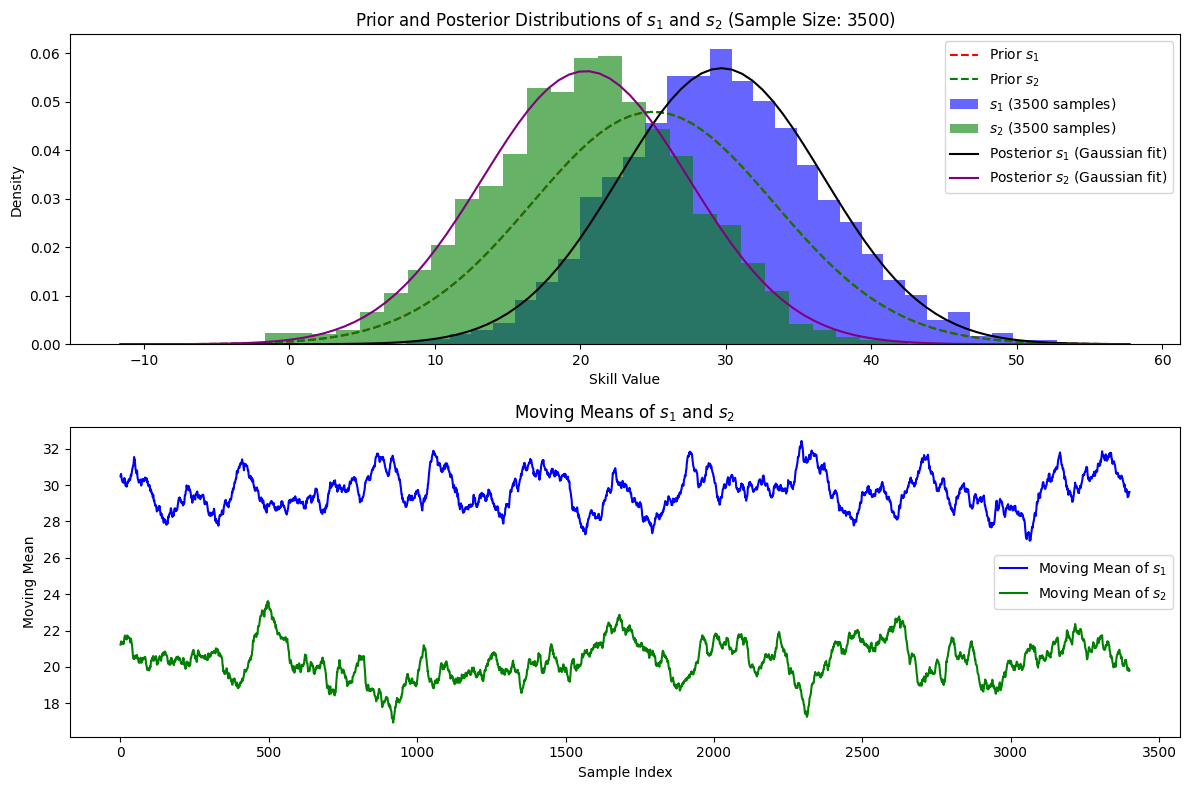

Sampled Mean of s1: 29.7007, Variance: 49.2041
Sampled Mean of s2: 20.3642, Variance: 50.2551
Time taken: 1.2014 seconds

Running Gibbs Sampler with 15000 iterations (burn-in 7500)...


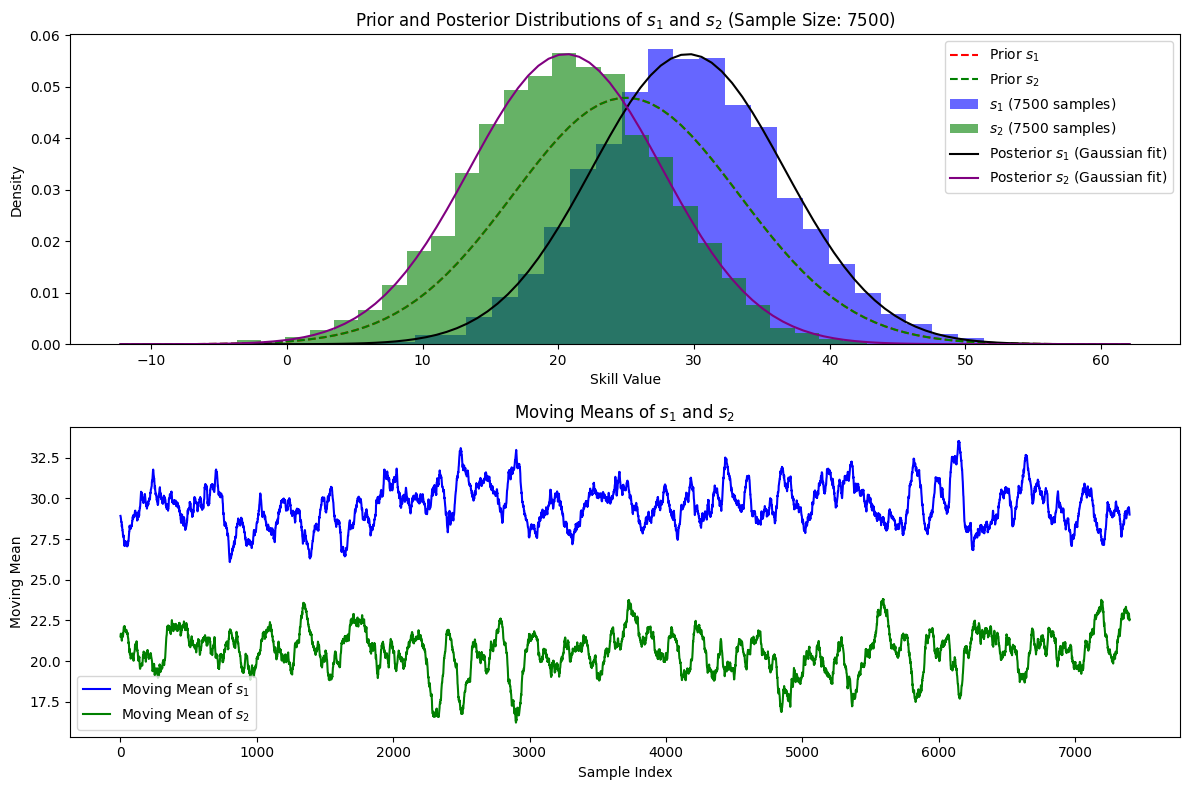

Sampled Mean of s1: 29.5718, Variance: 50.1415
Sampled Mean of s2: 20.5681, Variance: 50.1393
Time taken: 2.2460 seconds

Running Gibbs Sampler with 30000 iterations (burn-in 15000)...


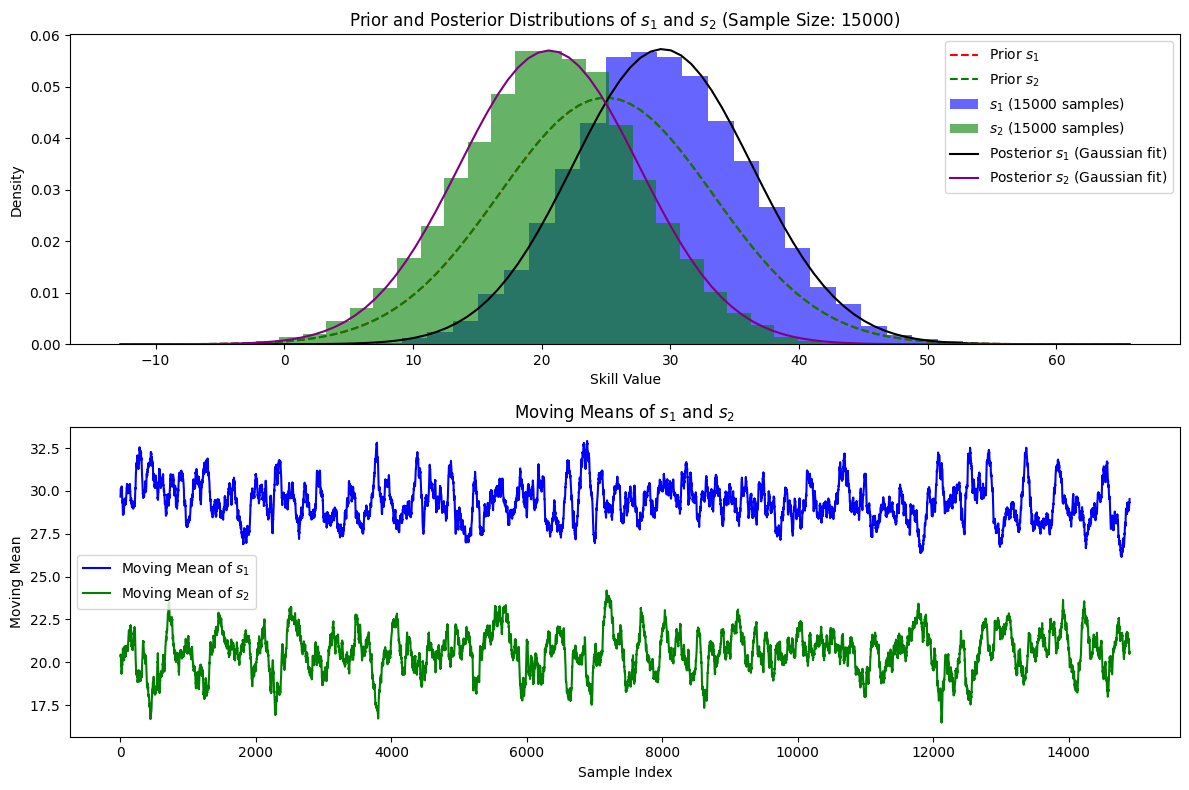

Sampled Mean of s1: 29.3826, Variance: 48.4517
Sampled Mean of s2: 20.5839, Variance: 48.9277
Time taken: 4.0439 seconds

Running Gibbs Sampler with 100000 iterations (burn-in 50000)...


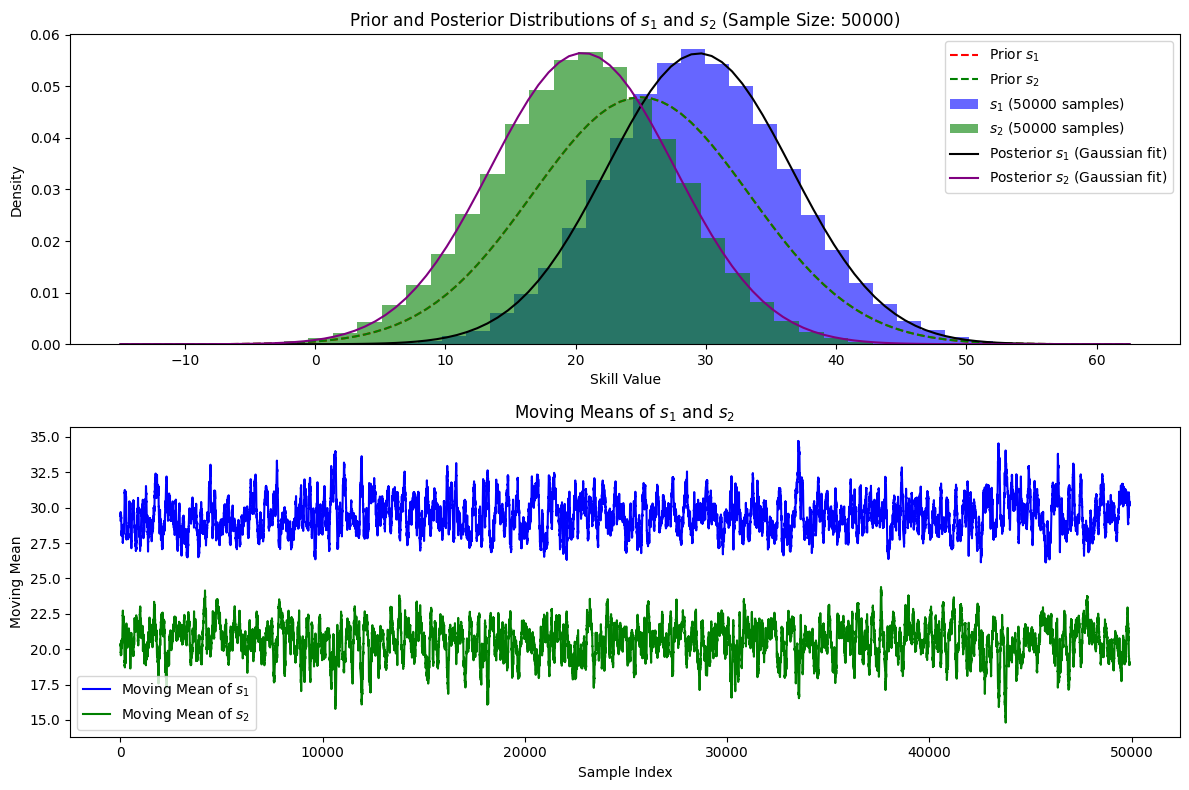

Sampled Mean of s1: 29.4782, Variance: 50.0534
Sampled Mean of s2: 20.5497, Variance: 49.9262
Time taken: 12.1973 seconds


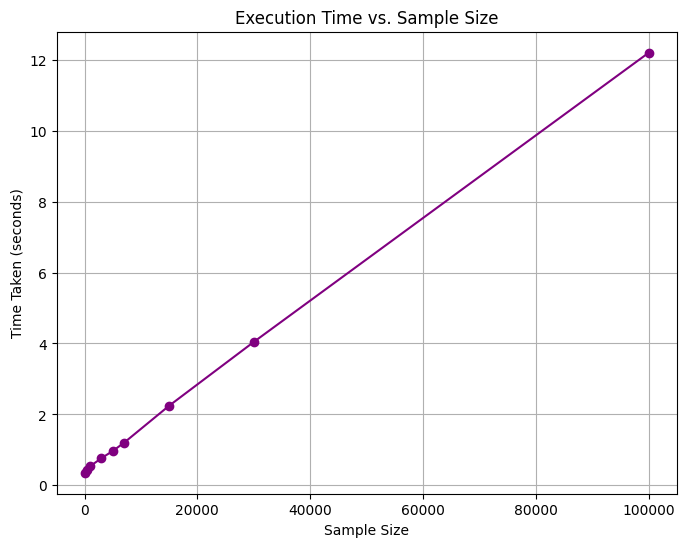

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm, multivariate_normal
import time

# Modified Gibbs sampling function with merged Gaussian distribution plot for s1 and s2
def gibbs_sampler_v2(K, burn_in, mu_1=25, mu_2=25, sigma_1=25/3, sigma_2=25/3, sigma_t=25/6, y=1, plot=False):
    mu_s = np.array([[mu_1], [mu_2]])
    A = np.array([[1, -1]])
    sigma_s = np.array([[sigma_1**2, 0], [0, sigma_2**2]])
    
    # Posterior covariance
    sigma_s_t = np.linalg.inv(np.linalg.inv(sigma_s) + (1 / sigma_t**2) * (A.T @ A))

    # Posterior mean function for the skills given `t`
    def mu_st(t):
        return sigma_s_t @ (np.linalg.inv(sigma_s) @ mu_s + A.T * (1 / sigma_t**2) * t)

    # Initialize samples arrays
    samples_s1 = np.zeros(K)
    samples_s2 = np.zeros(K)
    samples_t = np.zeros(K)
    
    # Initial values for the Gibbs sampling
    initial_mu = [mu_1, mu_2]
    samples_s1[0] = initial_mu[0]
    samples_s2[0] = initial_mu[1]
    samples_t[0] = initial_mu[0] - initial_mu[1]

    # Gibbs sampling loop
    for i in range(K - 1):
        # Update s1 and s2 based on the current t
        mu_s_t = mu_st(samples_t[i]).flatten()
        samples_s1[i + 1], samples_s2[i + 1] = np.random.multivariate_normal(mu_s_t, sigma_s_t)
        
        # Calculate mean of t and truncation limits based on y
        mu_t = samples_s1[i + 1] - samples_s2[i + 1]
        a = -mu_t / sigma_t
        if y == 1:  # Player 1 wins
            samples_t[i + 1] = truncnorm.rvs(a, np.inf, loc=mu_t, scale=sigma_t)
        elif y == -1:  # Player 2 wins
            samples_t[i + 1] = truncnorm.rvs(-np.inf, a, loc=mu_t, scale=sigma_t)

    # Discard burn-in samples
    s1_samples = samples_s1[burn_in:]
    s2_samples = samples_s2[burn_in:]

    # Optionally plot the results
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot Gaussian distributions and moving means for s1 and s2
        plt.subplot(2, 1, 1)
        # Prior distribution
        x = np.linspace(min(s1_samples.min(), s2_samples.min()) - 5, max(s1_samples.max(), s2_samples.max()) + 5, 100)
        plt.plot(x, norm.pdf(x, mu_1, sigma_1), 'r--', label='Prior $s_1$')
        plt.plot(x, norm.pdf(x, mu_2, sigma_2), 'g--', label='Prior $s_2$')
        
        # Posterior histograms and Gaussian fits
        plt.hist(s1_samples, bins=30, density=True, alpha=0.6, color='blue', label=f'$s_1$ ({len(s1_samples)} samples)')
        plt.hist(s2_samples, bins=30, density=True, alpha=0.6, color='green', label=f'$s_2$ ({len(s2_samples)} samples)')
        
        # Gaussian fit for posterior
        plt.plot(x, multivariate_normal.pdf(x, np.mean(s1_samples), np.var(s1_samples)), color='black', label='Posterior $s_1$ (Gaussian fit)')
        plt.plot(x, multivariate_normal.pdf(x, np.mean(s2_samples), np.var(s2_samples)), color='purple', label='Posterior $s_2$ (Gaussian fit)')
        plt.title(f'Prior and Posterior Distributions of $s_1$ and $s_2$ (Sample Size: {len(s1_samples)})')
        plt.xlabel('Skill Value')
        plt.ylabel('Density')
        plt.legend()

        # Plot moving mean of s1 and s2
        plt.subplot(2, 1, 2)
        moving_mean_s1 = np.convolve(s1_samples, np.ones(100)/100, mode='valid')
        moving_mean_s2 = np.convolve(s2_samples, np.ones(100)/100, mode='valid')
        plt.plot(moving_mean_s1, label='Moving Mean of $s_1$', color='blue')
        plt.plot(moving_mean_s2, label='Moving Mean of $s_2$', color='green')
        plt.title('Moving Means of $s_1$ and $s_2$')
        plt.xlabel('Sample Index')
        plt.ylabel('Moving Mean')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    return s1_samples, s2_samples

# Test the modified Gibbs sampler with different sample sizes
sample_sizes = [100, 500, 1000, 3000, 5000, 7000, 15000, 30000, 100000]
burn_in_times = []

for K in sample_sizes:
    burn_in = int(K / 2)
    print(f"\nRunning Gibbs Sampler with {K} iterations (burn-in {burn_in})...")
    
    start_time = time.time()
    s1_samples, s2_samples = gibbs_sampler_v2(K, burn_in, plot=True)
    elapsed_time = time.time() - start_time
    burn_in_times.append(elapsed_time)

    # Print results summary
    print(f"Sampled Mean of s1: {np.mean(s1_samples):.4f}, Variance: {np.var(s1_samples):.4f}")
    print(f"Sampled Mean of s2: {np.mean(s2_samples):.4f}, Variance: {np.var(s2_samples):.4f}")
    print(f"Time taken: {elapsed_time:.4f} seconds")

# Plot execution time vs sample size
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, burn_in_times, marker='o', color='purple')
plt.title('Execution Time vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()


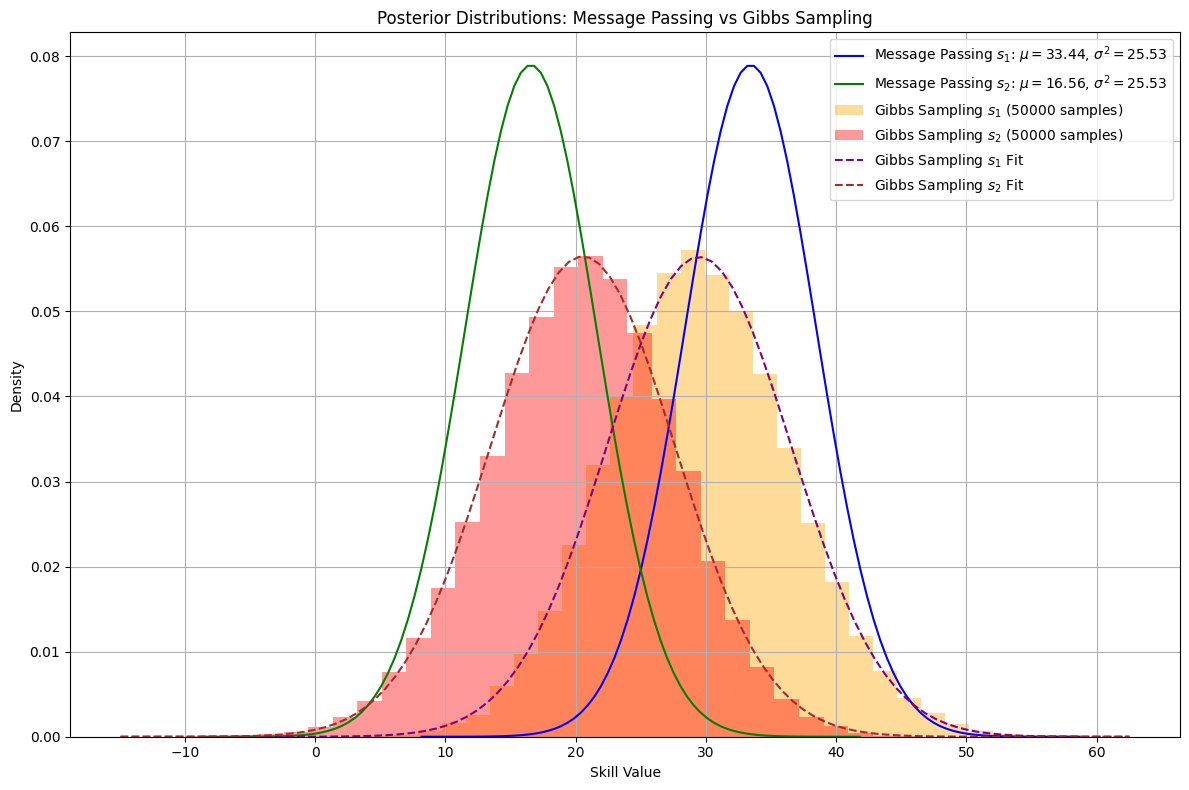

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm, multivariate_normal

# Assuming you have already run the Gibbs sampler and have `s1_samples` and `s2_samples`
# along with the posteriors from message passing: mu_s1_m, mu_s1_s, mu_s2_m, mu_s2_s

# Generate points for plotting Gaussian distributions from message passing
x_s1 = np.linspace(mu_s1_m - 5*np.sqrt(mu_s1_s), mu_s1_m + 5*np.sqrt(mu_s1_s), 100)
x_s2 = np.linspace(mu_s2_m - 5*np.sqrt(mu_s2_s), mu_s2_m + 5*np.sqrt(mu_s2_s), 100)

# Compute the Gaussian PDFs for s1 and s2 from message passing
pdf_s1_message = norm.pdf(x_s1, mu_s1_m, np.sqrt(mu_s1_s))
pdf_s2_message = norm.pdf(x_s2, mu_s2_m, np.sqrt(mu_s2_s))

# Plotting
plt.figure(figsize=(12, 8))

# Message passing distributions
plt.plot(x_s1, pdf_s1_message, label=f"Message Passing $s_1$: $\mu={mu_s1_m:.2f}$, $\sigma^2={mu_s1_s:.2f}$", color='blue')
plt.plot(x_s2, pdf_s2_message, label=f"Message Passing $s_2$: $\mu={mu_s2_m:.2f}$, $\sigma^2={mu_s2_s:.2f}$", color='green')

# Histogram for Gibbs sampling
plt.hist(s1_samples, bins=30, density=True, alpha=0.4, color='orange', label=f'Gibbs Sampling $s_1$ ({len(s1_samples)} samples)')
plt.hist(s2_samples, bins=30, density=True, alpha=0.4, color='red', label=f'Gibbs Sampling $s_2$ ({len(s2_samples)} samples)')

# Gaussian fits for Gibbs sampling
x_gibbs = np.linspace(min(np.min(s1_samples), np.min(s2_samples)) - 5, max(np.max(s1_samples), np.max(s2_samples)) + 5, 100)
pdf_s1_gibbs = norm.pdf(x_gibbs, np.mean(s1_samples), np.std(s1_samples))
pdf_s2_gibbs = norm.pdf(x_gibbs, np.mean(s2_samples), np.std(s2_samples))

# Plot Gaussian fits
plt.plot(x_gibbs, pdf_s1_gibbs, color='purple', label='Gibbs Sampling $s_1$ Fit', linestyle='--')
plt.plot(x_gibbs, pdf_s2_gibbs, color='brown', label='Gibbs Sampling $s_2$ Fit', linestyle='--')

# Titles and labels
plt.title('Posterior Distributions: Message Passing vs Gibbs Sampling')
plt.xlabel('Skill Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm, multivariate_normal
import matplotlib.colors as mcolors

# Load SerieA dataset
df = pd.read_csv('/Users/harivs/Documents/Github/Code_APML/SerieA.csv', header=None, names=['date', 'team1', 'team2', 'score1', 'score2'], skiprows=1)

# Filter out draws
df = df[df['score1'] != df['score2']]

# Initialize team skills
teams = list(set(df['team1']).union(set(df['team2'])))
team_skills = {team: {'mean': 25, 'variance': (25/3)**2} for team in teams}  # Initial priors

# Gibbs sampling function for ADF
def gibbs_sampler_v2(K, burn_in, mu_1=25, mu_2=25, sigma_1=25/3, sigma_2=25/3, sigma_t=25/6, y=1):
    mu_s = np.array([[mu_1], [mu_2]])
    A = np.array([[1, -1]])
    sigma_s = np.array([[sigma_1**2, 0], [0, sigma_2**2]])
    sigma_s_t = np.linalg.inv(np.linalg.inv(sigma_s) + (1 / sigma_t**2) * (A.T @ A))

    def mu_st(t):
        return sigma_s_t @ (np.linalg.inv(sigma_s) @ mu_s + A.T * (1 / sigma_t**2) * t)

    samples_s1 = np.zeros(K)
    samples_s2 = np.zeros(K)
    samples_t = np.zeros(K)
    
    initial_mu = [mu_1, mu_2]
    samples_s1[0] = initial_mu[0]
    samples_s2[0] = initial_mu[1]
    samples_t[0] = initial_mu[0] - initial_mu[1]

    for i in range(K - 1):
        mu_s_t = mu_st(samples_t[i]).flatten()
        samples_s1[i + 1], samples_s2[i + 1] = np.random.multivariate_normal(mu_s_t, sigma_s_t)
        mu_t = samples_s1[i + 1] - samples_s2[i + 1]
        a = -mu_t / sigma_t
        samples_t[i + 1] = truncnorm.rvs(a, np.inf, loc=mu_t, scale=sigma_t) if y == 1 else truncnorm.rvs(-np.inf, a, loc=mu_t, scale=sigma_t)

    s1_samples = samples_s1[burn_in:]
    s2_samples = samples_s2[burn_in:]

    return s1_samples, s2_samples

def gibbs_sampler_adf(mu_1, sigma_1, mu_2, sigma_2, y, K=10):
    s1_samples, s2_samples = gibbs_sampler_v2(K, burn_in=int(K/2), mu_1=mu_1, mu_2=mu_2, sigma_1=np.sqrt(sigma_1), sigma_2=np.sqrt(sigma_2), y=y)
    return np.mean(s1_samples), np.var(s1_samples), np.mean(s2_samples), np.var(s2_samples)

def run_adf(df, team_skills, k=3):
    for _, match in df.iterrows():
        team1, team2 = match['team1'], match['team2']
        y = 1 if match['score1'] > match['score2'] else 0

        prior_mean_1, prior_var_1 = team_skills[team1]['mean'], team_skills[team1]['variance']
        prior_mean_2, prior_var_2 = team_skills[team2]['mean'], team_skills[team2]['variance']
        
        post_mean_1, post_var_1, post_mean_2, post_var_2 = gibbs_sampler_adf(prior_mean_1, prior_var_1, prior_mean_2, prior_var_2, y)

        team_skills[team1] = {'mean': post_mean_1, 'variance': post_var_1}
        team_skills[team2] = {'mean': post_mean_2, 'variance': post_var_2}

    for team, skill in team_skills.items():
        skill['rank_score'] = skill['mean'] - k * np.sqrt(skill['variance'])

    return team_skills

# Function to create a ranking table plot with mean and variance in bars
def plot_ranking_table(team_skills, title, top_n=5):
    sorted_skills = sorted(team_skills.items(), key=lambda x: x[1]['rank_score'], reverse=True)
    
    teams = [team for team, skill in sorted_skills]
    ranks = np.arange(1, len(teams) + 1)
    means = [skill['mean'] for team, skill in sorted_skills]
    variances = [skill['variance'] for team, skill in sorted_skills]
    std_devs = np.sqrt(variances)

    norm = mcolors.Normalize(vmin=min(variances), vmax=max(variances))
    cmap = plt.cm.coolwarm

    fig, ax = plt.subplots(figsize=(10, 0.5 * len(teams)))
    colors = [cmap(norm(var)) for var in variances]
    bars = ax.barh(ranks, means, xerr=std_devs, color=colors, edgecolor='black', capsize=5, height=0.5, alpha=0.8)

    for i, (rank, team, mean, var) in enumerate(zip(ranks, teams, means, variances)):
        is_top_team = i < top_n

        ax.text(-5, rank, f'{rank}', va='center', ha='center', weight='bold' if is_top_team else 'normal', 
                color='gold' if is_top_team else 'black')
        ax.text(mean - 0.75 * np.sqrt(var), rank, f"{team} ({mean:.1f}, {var:.3f})", va='center', ha='right', 
                weight='bold' if is_top_team else 'normal', color='navy' if is_top_team else 'black')

    ax.set_yticks(ranks)
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.set_xlabel('Skill Mean ± Variance')
    ax.set_title(title)

    for rank in ranks:
        ax.axhline(rank, color='gray', linewidth=0.5, linestyle='--', alpha=0.7)

    plt.xlim(0, max(means) + max(std_devs) * 1.5)
    plt.tight_layout()
    plt.show()

# Run ADF for non-randomized and randomized data
final_team_skills = run_adf(df, team_skills)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
final_team_skills_shuffled = run_adf(df_shuffled, {team: {'mean': 25, 'variance': (25/3)**2} for team in teams})

# Plot both rankings side-by-side
plt.figure(figsize=(16, 8))
plt.suptitle("Team Rankings with TrueSkill-like Scores")

# Non-randomized ranking
plt.subplot(1, 2, 1)
plot_ranking_table(final_team_skills, "Non-Randomized Team Ranking")

# Randomized ranking
plt.subplot(1, 2, 2)
plot_ranking_table(final_team_skills_shuffled, "Randomized Team Ranking")

plt.tight_layout()
plt.show()
